In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/data.csv")
df.isna()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head())
print(df.isnull().sum())
# Split into features and labels
X = df['Body']
y = df['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                                                URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singe

In [32]:
# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Check the shape of the data
print(X_train_tfidf.shape, X_test_tfidf.shape)


(3190, 10000) (798, 10000)


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

# FNNet model architecture
def fnnnet_model(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(input_dim,)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    return model

# Define model
fnnnet = fnnnet_model(X_train_tfidf.shape[1])

# Compile model
fnnnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model architecture
fnnnet.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               5120512   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5284865 (20.16 MB)
Trainable params: 528

In [34]:
# Train the FNNet model
history = fnnnet.fit(X_train_tfidf, y_train, epochs=50, batch_size=64, validation_data=(X_test_tfidf, y_test))

# Evaluate the model
loss, accuracy = fnnnet.evaluate(X_test_tfidf, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/50
50/50 [==============================] - 2s 23ms/step - loss: 0.2718 - accuracy: 0.8962 - val_loss: 0.0824 - val_accuracy: 0.9837
Epoch 2/50
50/50 [==============================] - 1s 18ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0822 - val_accuracy: 0.9749
Epoch 3/50
50/50 [==============================] - 1s 18ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0744 - val_accuracy: 0.9850
Epoch 4/50
50/50 [==============================] - 1s 19ms/step - loss: 1.9686e-04 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9850
Epoch 5/50
50/50 [==============================] - 1s 18ms/step - loss: 1.0426e-04 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9850
Epoch 6/50
50/50 [==============================] - 1s 18ms/step - loss: 7.2061e-05 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9850
Epoch 7/50
50/50 [==============================] - 1s 18ms/step - loss: 5.3851e-05 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.98

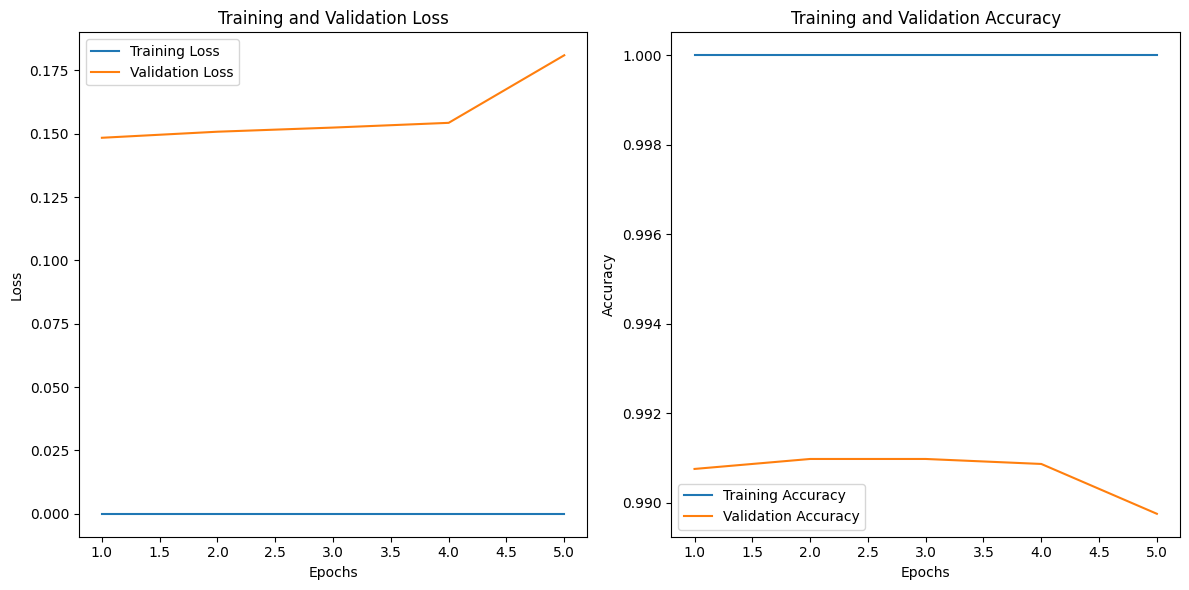

In [35]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import classification_report
import numpy as np


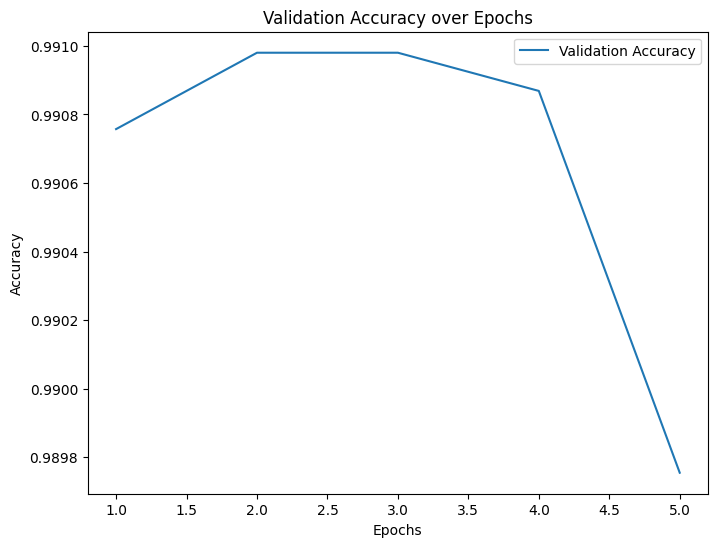

In [37]:
# prompt: give the code for getting validation accuracy for the above model and show it graphically

# Plot the validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()


In [38]:
# prompt: take the input from the user and predict if the article given is true or fake from the trained model

# Get input from the user
user_input = input("Enter the news article: ")

# Call the prediction function
result = predict_news(user_input, fnnnet, vectorizer)
print(f"The news is: {result}")


Enter the news article: The state government is nearing the final stages of selecting a site for Bengaluru's second international airport, with the location likely to be near Nelamangala. After thorough evaluation, the area between Nelamangala and Kunigal, along National Highway 75, has been identified as the most suitable for the new airport, according to sources.
1/1 [==============================] - 0s 69ms/step
The news is: Fake News


In [39]:
# prompt: take the input from the user and predict if the article given is true or fake from the trained model

# Get input from the user
user_input = input("Enter the news article: ")

# Call the prediction function
result = predict_news(user_input, fnnnet, vectorizer)
print(f"The news is: {result}")


Enter the news article: Fred Rogers served as a sniper during the Vietnam War and had a large number of confirmed kills. Fred Rogers wore his iconic sweaters to conceal the extensive tattoos on his arms that were acquired while serving in the military.
1/1 [==============================] - 0s 27ms/step
The news is: True News


In [40]:
# prompt: take the input from the user and predict if the article given is true or fake from the trained model

# Get input from the user
user_input = input("Enter the news article: ")

# Call the prediction function
result = predict_news(user_input, fnnnet, vectorizer)
print(f"The news is: {result}")


Enter the news article: Fred Rogers served as a sniper during the Vietnam War and had a large number of confirmed kills. Fred Rogers wore his iconic sweaters to conceal the extensive tattoos on his arms that were acquired while serving in the military.
1/1 [==============================] - 0s 27ms/step
The news is: True News


In [41]:
!pip install wordcloud

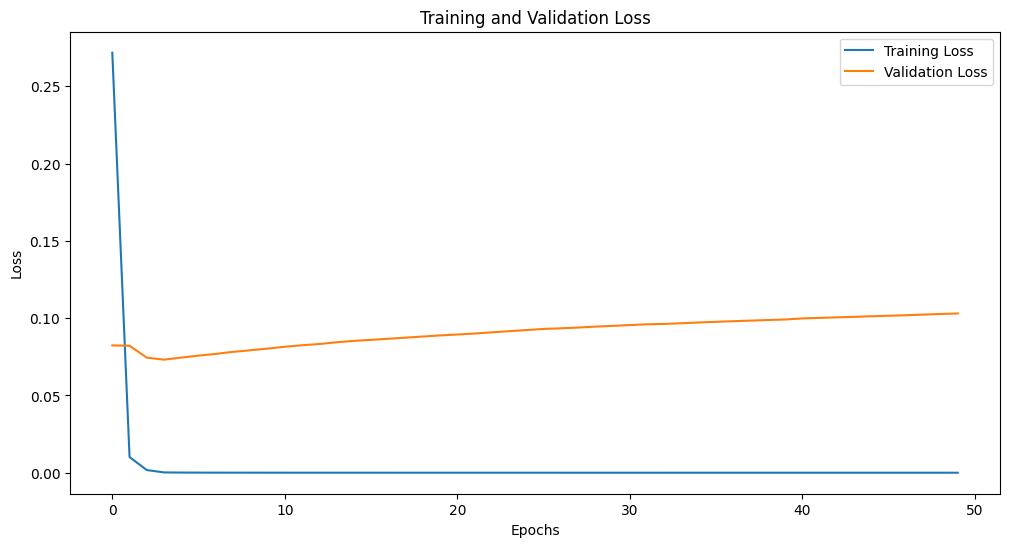

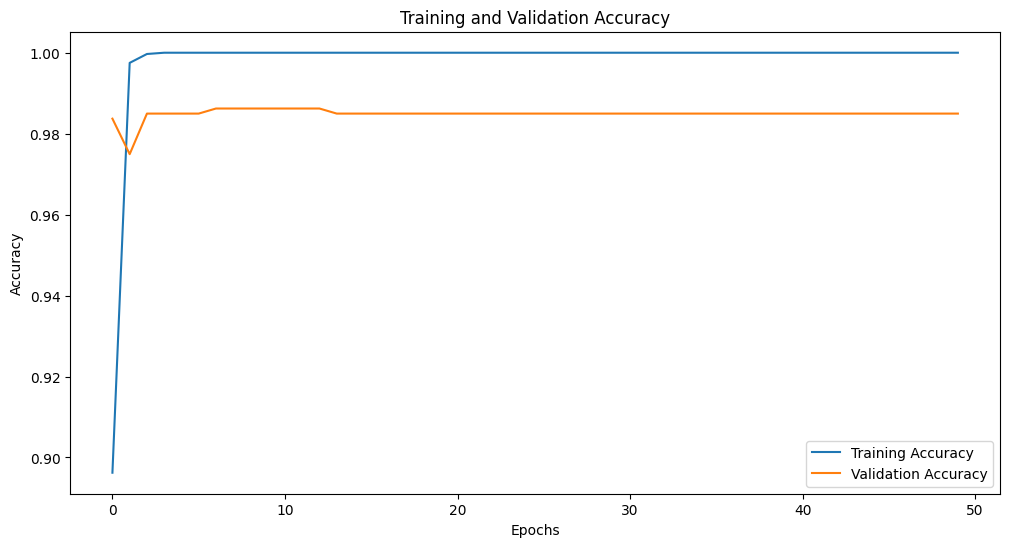

25/25 [==============================] - 0s 3ms/step


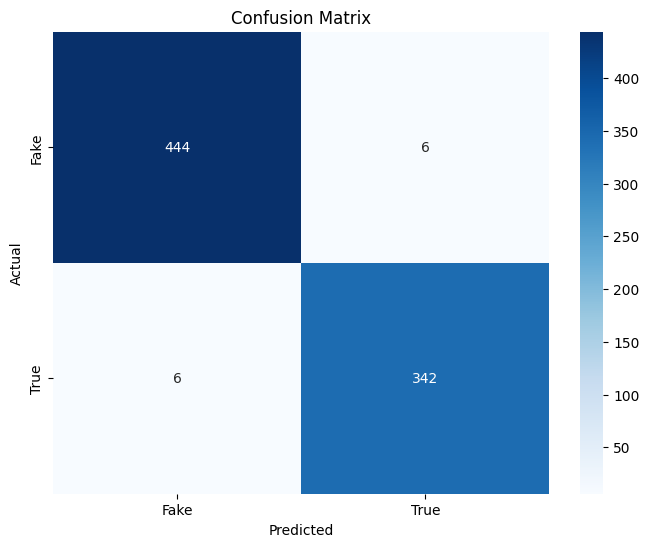

25/25 [==============================] - 0s 3ms/step


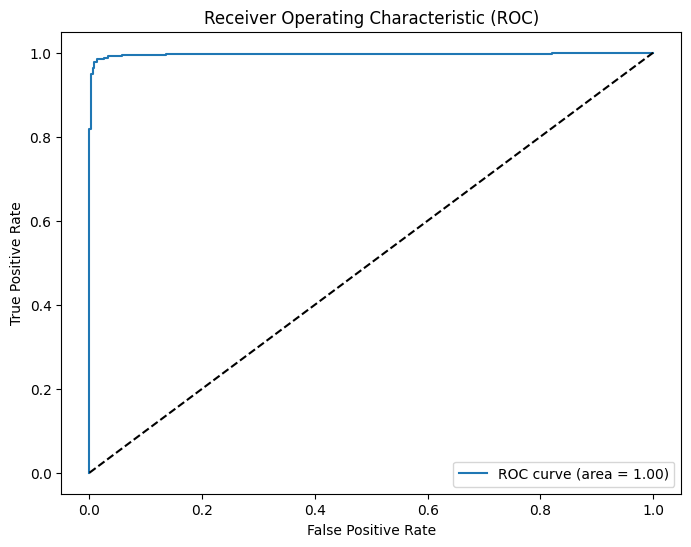

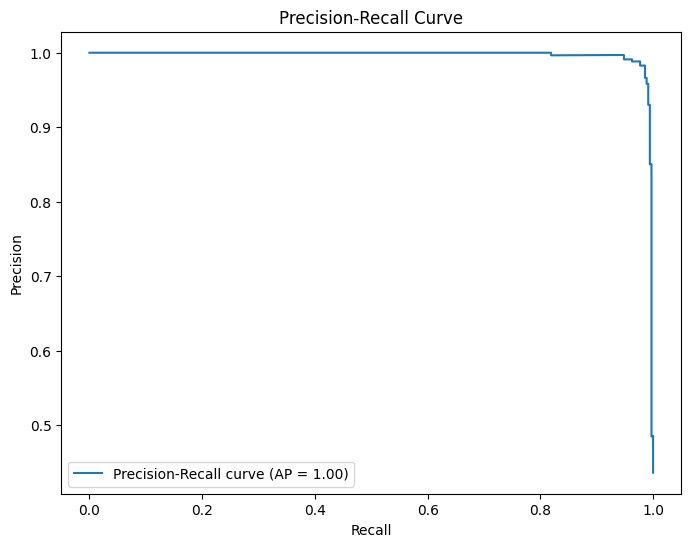

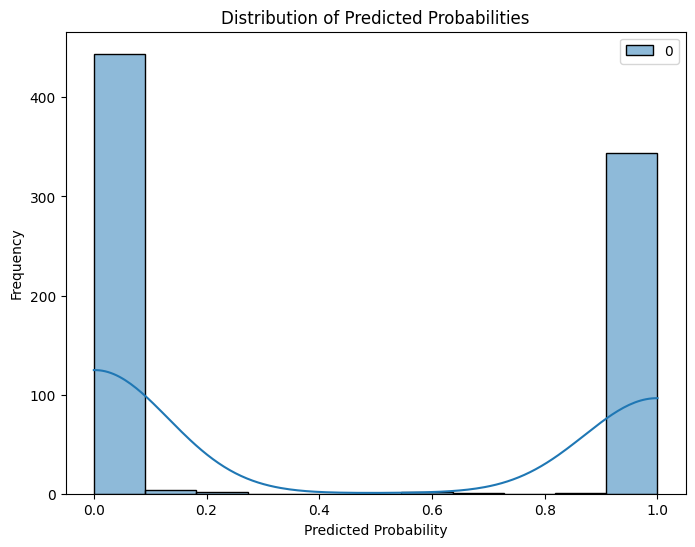

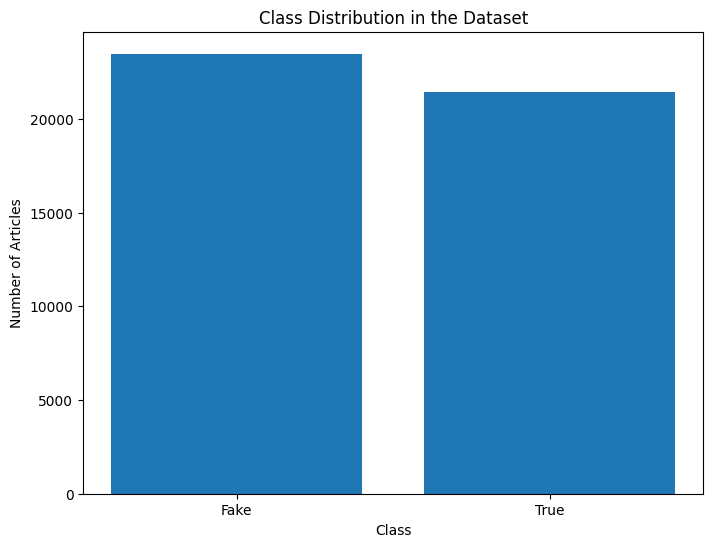

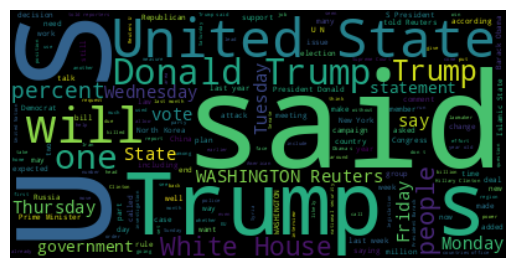

In [42]:
# prompt: give all the codes for all the possible ways for visuals and graphs available for this model

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 2. Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 3. Plot Confusion Matrix (requires predictions on test data)
from sklearn.metrics import confusion_matrix

y_pred = (fnnnet.predict(X_test_tfidf) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Plot ROC Curve (requires predictions on test data)
from sklearn.metrics import roc_curve, auc

y_pred_proba = fnnnet.predict(X_test_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 5. Plot Precision-Recall Curve (requires predictions on test data)
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 6. Distribution of Predicted Probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

# 7. Bar plot of class distribution in the dataset
class_counts = combined_df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(['Fake', 'True'], class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Articles')
plt.title('Class Distribution in the Dataset')
plt.show()

# 8. Word Cloud (requires text preprocessing)
from wordcloud import WordCloud

# Combine all text from true news
true_text = ' '.join(combined_df[combined_df['label'] == 1]['text'].tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(true_text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




25/25 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       450
           1       0.98      0.98      0.98       348

    accuracy                           0.98       798
   macro avg       0.98      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798



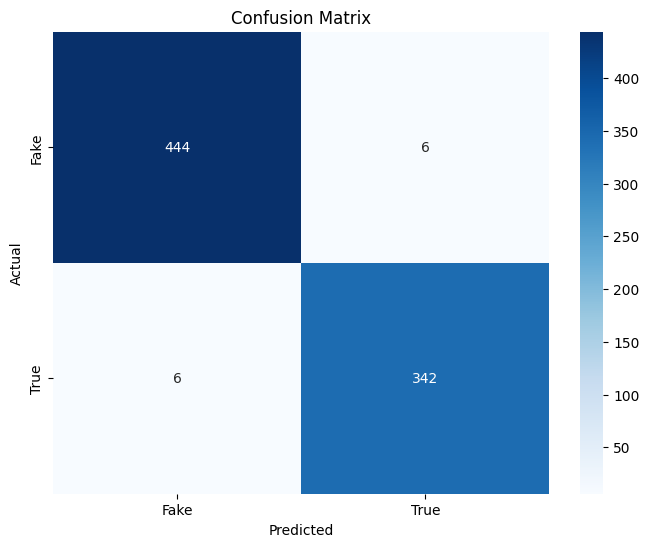

In [43]:
# prompt: classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = fnnnet.predict(X_test_tfidf)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype("int32")

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


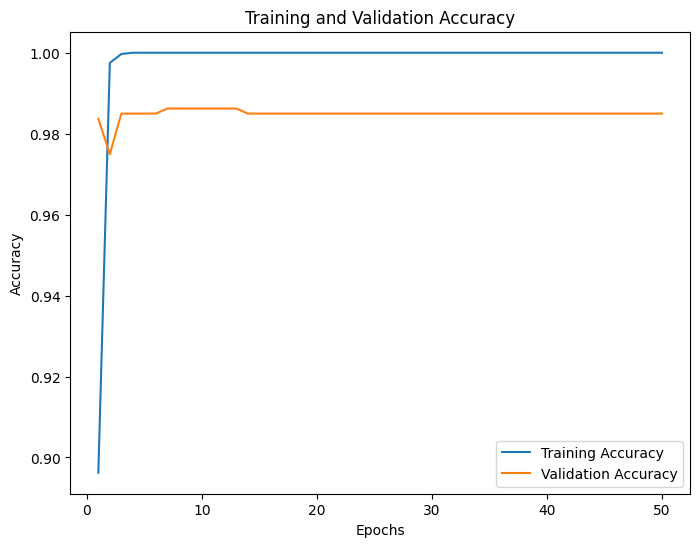

In [44]:
# prompt: code for validation acuracy of this model both graphically

import matplotlib.pyplot as plt

# Assuming you have 'history' from your model training
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
epochs = len(train_accuracies)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
